In [1]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import os
import pandas as pd

DOWNLOAD_ROOT = "http://raw.githubusercontent.com/Paulywhirl/cs4442_asn2/master"
DATA_PATH = os.path.join("data")

def fetch_train_data(data_path=DATA_PATH):
        csv_path = os.path.join(data_path, "train.csv")
        return pd.read_csv(csv_path)
    
def fetch_test_data(data_path=DATA_PATH):
        csv_path = os.path.join(data_path, "test.csv")
        return pd.read_csv(csv_path)


In [3]:
train = fetch_train_data()
test = fetch_test_data()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Saving figure attribute_histogram_plots


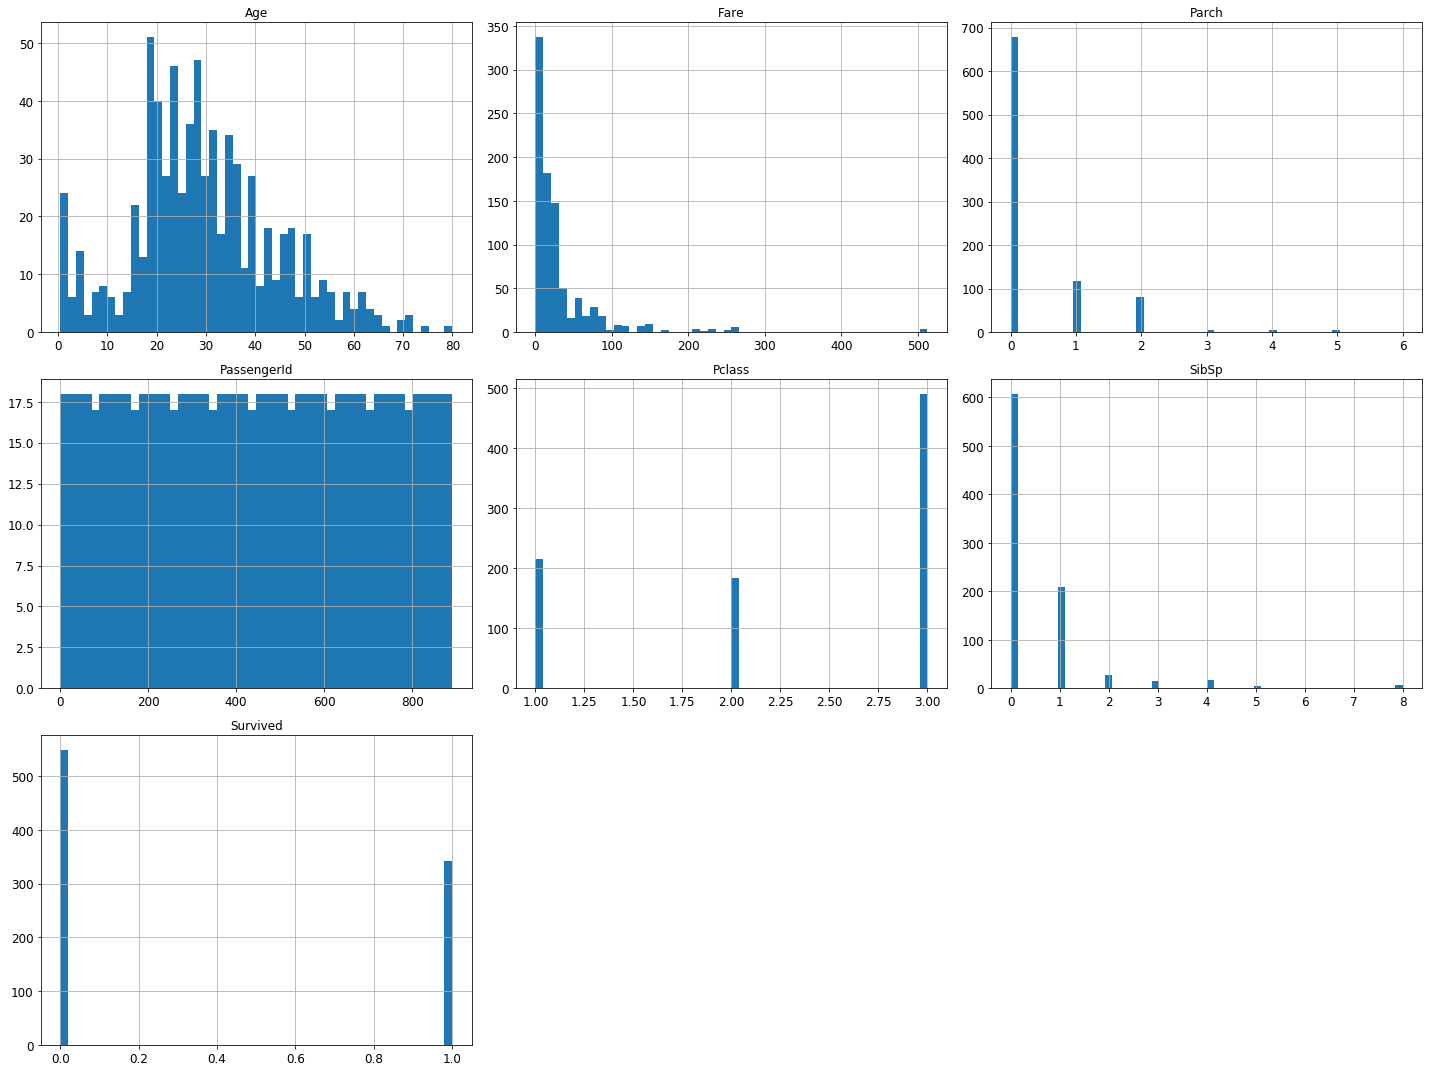

In [7]:
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [8]:
np.random.seed(42)

In [9]:
survivalData = train.loc[train['Survived'] == 1]
deadData = train.loc[train['Survived'] == 0]

In [10]:
corr_matrix = train.corr()

In [11]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Saving figure scatter_matrix_plot


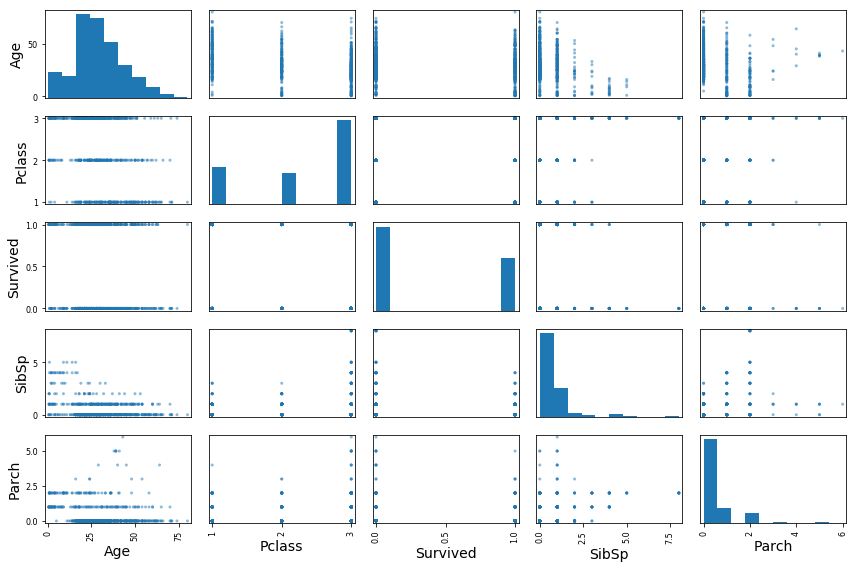

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["Age", "Sex", "Pclass", "Survived", "SibSp", "Parch"]
scatter_matrix(train[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure scatter_matrix_plot


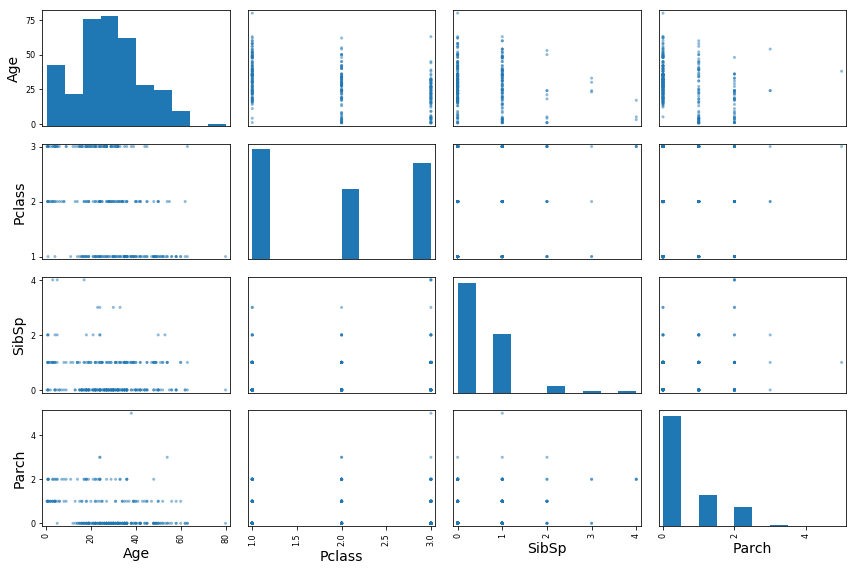

In [13]:
from pandas.plotting import scatter_matrix

attributes = ["Age", "Sex", "Pclass", "SibSp", "Parch"]
scatter_matrix(survivalData[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure Age Distribution of Survivors


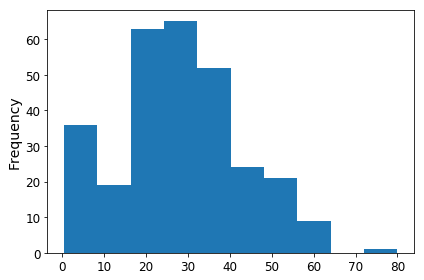

In [14]:
survivalData["Age"].plot(kind="hist")
save_fig("Age Distribution of Survivors")

Saving figure Odds of living based on Spouses and Siblings


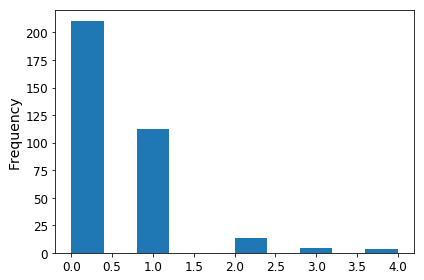

In [15]:
survivalData["SibSp"].plot(kind="hist")
save_fig("Odds of living based on Spouses and Siblings")

Saving figure Odds of living based on Parents and Children


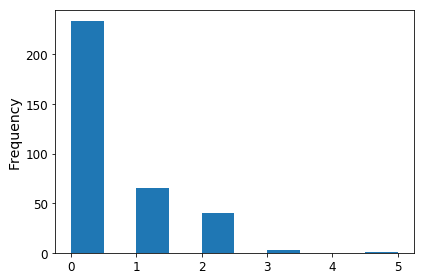

In [16]:
survivalData["Parch"].plot(kind="hist")
save_fig("Odds of living based on Parents and Children")

Saving figure Odds of living based on Pclass


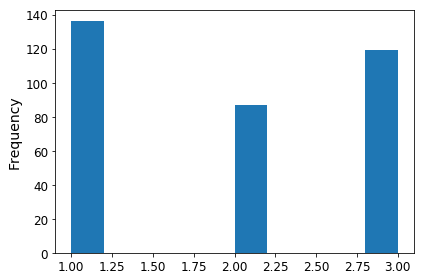

In [17]:
survivalData["Pclass"].plot(kind="hist")
save_fig("Odds of living based on Pclass")

In [71]:
train_fix = train.drop(["Name", "Cabin", "Ticket", "PassengerId", "Embarked"], axis=1)
test_fix = test.drop(["Name", "Cabin", "Ticket", "PassengerId", "Embarked"], axis=1)
train_fix.Sex = train_fix.Sex.map({'female':0, 'male':1})
test_fix.Sex = test_fix.Sex.map({'female':0, 'male':1})
mean = test_fix.Age.mean()
test_fix.Age.fillna(mean,inplace=True)
mean = test_fix.Fare.mean()
test_fix.Fare.fillna(mean,inplace=True)
mode = test_fix.Sex.mode()
test_fix.Sex.fillna(mode,inplace=True)
mean = train_fix.Age.mean()
train_fix.Age.fillna(mean,inplace=True)
mean = train_fix.Fare.mean()
train_fix.Fare.fillna(mean,inplace=True)
mode = train_fix.Sex.mode()
train_fix.Sex.fillna(mode,inplace=True)

In [76]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
X = train_fix.drop(["Survived"], axis=1)
gnb.fit(X, train["Survived"])

GaussianNB(priors=None, var_smoothing=1e-09)

In [77]:
predictionLR = gnb.predict(test_fix)
predictionLR = pd.DataFrame(predictionLR)
predictionLR.columns = ['Survived']
testr = pd.concat([test_fix,predictionLR], axis=1)
testr['Survived'] = testr['Survived'].astype(int)
testr.head()
print(predictionLR)

     Survived
0           0
1           1
2           0
3           0
4           1
5           0
6           1
7           0
8           1
9           0
10          0
11          0
12          1
13          0
14          1
15          1
16          0
17          0
18          1
19          1
20          0
21          0
22          1
23          1
24          1
25          0
26          1
27          0
28          0
29          0
..        ...
388         0
389         0
390         1
391         1
392         0
393         0
394         0
395         1
396         0
397         1
398         0
399         0
400         1
401         0
402         1
403         0
404         0
405         0
406         0
407         1
408         1
409         1
410         1
411         1
412         1
413         0
414         1
415         0
416         0
417         0

[418 rows x 1 columns]


In [78]:
test = pd.read_csv('./data/test.csv')
test = pd.concat([test, predictionLR], axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [79]:
my_submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': test.Survived})
my_submission.to_csv('submission_gnb.csv', index=False)